<a href="https://colab.research.google.com/github/trisha025/building-rnn/blob/master/building_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing repository from github
!git clone https://github.com/EKami/deep_learning_A-Z.git

Cloning into 'deep_learning_A-Z'...
remote: Enumerating objects: 10305, done.
remote: Total 10305 (delta 0), reused 0 (delta 0), pack-reused 10305
Receiving objects: 100% (10305/10305), 237.98 MiB | 31.07 MiB/s, done.
Resolving deltas: 100% (142/142), done.
Checking out files: 100% (10130/10130), done.


In [0]:
#uploading training dataset
training_set = pd.read_csv('deep_learning_A-Z/Volume_1-Supervised_Deep_Learning/Part_3-Recurrent_Neural_Networks-RNN/dataset/Google_Stock_Price_Train.csv')

In [0]:
#extracting the first column
training_set = training_set.iloc[:, 1:2].values

In [0]:
#importing libraries for feature scaling
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [7]:
print(training_set)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [0]:
X_train = training_set[0:1257]

In [0]:
y_train = training_set[1:1258]

In [0]:
#reshaping to 3D
X_train = np.reshape(X_train, (1257, 1, 1))

In [11]:
#importing keras models and layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:
#initialising rnn
regressor = Sequential()

In [0]:
#adding LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [0]:
#adding output layer
regressor.add(Dense(units = 1))

In [0]:
#compiling the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
#fitting the model
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 3s 2ms/step - loss: 0.0870
Epoch 2/200
1257/1257 [==============================] - 0s 226us/step - loss: 0.0817
Epoch 3/200
1257/1257 [==============================] - 0s 227us/step - loss: 0.0798
Epoch 4/200
1257/1257 [==============================] - 0s 231us/step - loss: 0.0779
Epoch 5/200
1257/1257 [==============================] - 0s 226us/step - loss: 0.0760
Epoch 6/200
1257/1257 [==============================] - 0s 235us/step - loss: 0.0740
Epoch 7/200
1257/1257 [==============================] - 0s 223us/step - loss: 0.0719
Epoch 8/200
1257/1257 [==============================] - 0s 233us/step - loss: 0.0699
Epoch 9/200
1257/1257 [==============================] - 0s 219us/step - loss: 0.0677
Epoch 10/200
1257/1257 [==============================] - 0s 239us/step - loss: 0.0655
Epoch 11/200
1257/1257 [==============================] - 0s 226us/step - loss: 0.0632
Epoch 12/200
1257/1257 [==============================

In [0]:
#testing the model
test_set = pd.read_csv('deep_learning_A-Z/Volume_1-Supervised_Deep_Learning/Part_3-Recurrent_Neural_Networks-RNN/dataset/Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:, 1:2].values

In [18]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [0]:
#feature scaling
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))

In [0]:
#prediction
predicted_stock_price = regressor.predict(inputs)

In [0]:
#scaling to original values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [22]:
print(predicted_stock_price)

[[776.863  ]
 [786.18774]
 [783.9628 ]
 [792.86115]
 [802.989  ]
 [804.31415]
 [801.71783]
 [803.66077]
 [803.96936]
 [803.6063 ]
 [802.45337]
 [801.82684]
 [803.452  ]
 [803.7606 ]
 [817.3931 ]
 [824.00446]
 [831.38666]
 [828.59424]
 [810.4794 ]
 [794.3176 ]]


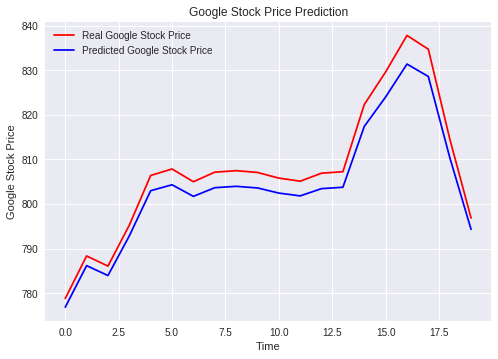

In [23]:
#visualisation
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()